In [43]:
import cv2
import os
import numpy as np
from utils import show_images

# shape 模块 可以分类如下
# class  	cv::ShapeTransformer
    # class  	cv::AffineTransformer
    # class  	cv::ThinPlateSplineShapeTransformer
 
# class  	cv::HistogramCostExtractor
    # class  	cv::ChiHistogramCostExtractor
    # class  	cv::EMDHistogramCostExtractor
    # class  	cv::EMDL1HistogramCostExtractor
    # class  	cv::NormHistogramCostExtractor
 
# class  	cv::ShapeDistanceExtractor
    # class  	cv::HausdorffDistanceExtractor
    # class  	cv::ShapeContextDistanceExtractor

def draw_points(srcimg, points):
    result = np.zeros((srcimg.shape[0], srcimg.shape[1], 3))
    ps = points.reshape(-1, 2)
    for p in ps:
        result[int(p[1]), int(p[0])] = [0, 255, 0]
    return result.astype(np.uint8)

# **一个**轮廓 -> float32 的 points
def make_points(contour, n=None):
    points = contour.reshape(-1, 1, 2)

    # 本来到这里就结束了，不过 OpenCV 给的示例代码有下面类似的实现
    # 不是很清楚目的，估计为了加快速度，相当于重采样，在 contour 上选择 n 个点
    # 但是实际使用我感觉好影响准确率，n 的值不好把握，对于大的轮廓要大，但多大不好确定
    if n is not None:
        np.random.shuffle(points) # 先打乱这些点
        if points.shape[0] < n:
            new_array = np.pad(points, ((0, n-points.shape[0]), (0, 0), (0, 0)), 'edge')
            points = new_array
        else:
            points = points[:n]

    return points.astype(np.float32)


0.6541350170764999
0.6541350170764999
0.6541350170764999
0.6541350170764999


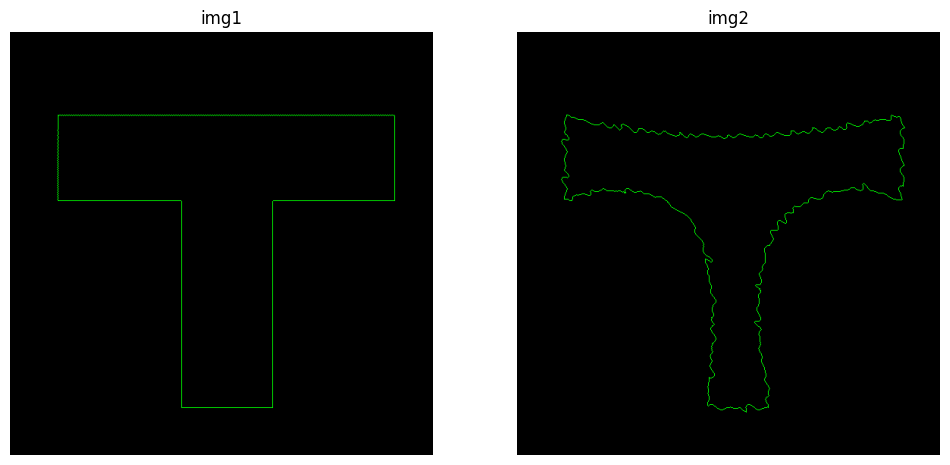

In [44]:
'''
测试 matchShapes
'''
img1 = cv2.imread('./image/shape/13.png', -1)
contours1, _ = cv2.findContours(img1, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
points1 = make_points(contours1[0])

img2 = cv2.imread('./image/shape/14.png', -1)
contours2, _ = cv2.findContours(img2, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
points2 = make_points(contours2[0])

print(cv2.matchShapes(points1.reshape((-1, 1, 2)), points2.reshape((-1, 1, 2)), 1, 0))
print(cv2.matchShapes(points1.astype(int), points2.astype(int), 1, 0))
print(cv2.matchShapes(points1.reshape((1, -1, 2)), points2.reshape((1, -1, 2)), 1, 0))
print(cv2.matchShapes(contours1[0], contours2[0], 1, 0))

show_images([
    ('img1', draw_points(img1, points1)),
    ('img2', draw_points(img2, points2)),
])


In [45]:
'''
Shape Distance Extractor 使用说明
'''
# class  	cv::ShapeDistanceExtractor -> computeDistance
    # class  	cv::HausdorffDistanceExtractor
    # class  	cv::ShapeContextDistanceExtractor
extractor = cv2.createShapeContextDistanceExtractor()

src = cv2.imread('./image/shape/13.png', -1)
src_contours, _ = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
src_points = make_points(src_contours[0], n=500)

for imgname in os.listdir('./image/shape'):
    now = cv2.imread(f'./image/shape/{imgname}', -1)
    now_contours, _ = cv2.findContours(now, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    now_points = make_points(now_contours[0], n=500)

    # 传入的必须是 (x, 1, 2) 或 (1, x, 2) 这种 shape 的 ndarray，两个 ndarray 的 x 不强制要一样
    result1 = extractor.computeDistance(src_points.reshape(1, -1, 2), now_points.reshape(1, -1, 2))
    result2 = extractor.computeDistance(src_points.reshape(-1, 1, 2), now_points.reshape(-1, 1, 2))
    print(imgname, result1, result2)
    break

1.png 6.965648651123047 6.965648651123047


In [36]:
'''
HistogramCostExtractor 使用说明
'''
# class  	cv::HistogramCostExtractor -> buildCostMatrix
    # class  	cv::ChiHistogramCostExtractor
    # class  	cv::EMDHistogramCostExtractor
    # class  	cv::EMDL1HistogramCostExtractor
    # class  	cv::NormHistogramCostExtractor
extractor = cv2.createChiHistogramCostExtractor()

src = cv2.imread('./image/shape/13.png', -1)
src_contours, _ = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
src_points = make_points(src_contours[0])

for imgname in os.listdir('./image/shape'):
    now = cv2.imread(f'./image/shape/{imgname}', -1)
    now_contours, _ = cv2.findContours(now, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    now_points = make_points(now_contours[0])

    result = extractor.buildCostMatrix(src_points, now_points)
    print(imgname)
    print(src_points.shape, now_points.shape)
    print(result.shape)
    break

1.png
(1657, 1, 2) (590, 1, 2)
(1682, 1682)


In [ ]:
'''
ShapeTransformer 配合 ShapeDistanceExtractor 使用
'''

# class  	cv::ShapeDistanceExtractor -> computeDistance
    # class  	cv::HausdorffDistanceExtractor
    # class  	cv::ShapeContextDistanceExtractor
extractor = cv2.createShapeContextDistanceExtractor()

img1 = cv2.imread('./image/shape/13.png', -1)
contours1, _ = cv2.findContours(img1, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
points1 = make_points(contours1[0])

img2 = cv2.imread('./image/shape/14.png', -1)
contours2, _ = cv2.findContours(img2, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
points2 = make_points(contours2[0])

# class  	cv::ShapeTransformer
    # class  	cv::AffineTransformer
    # class  	cv::ThinPlateSplineShapeTransformer

# **重要**：applyTransformation 必须是 (1, x, 2) 的 float32 的 ndarray!!
transformer = cv2.createAffineTransformer(fullAffine=True)
extractor.setTransformAlgorithm(transformer)
result = extractor.computeDistance(points1, points2)
_, trans_points1 = transformer.applyTransformation(points2.reshape(1, -1, 2))

transformer = cv2.createThinPlateSplineShapeTransformer()
extractor.setTransformAlgorithm(transformer)
result = extractor.computeDistance(points1, points2)
_, trans_points2 = transformer.applyTransformation(points2.reshape(1, -1, 2))

show_images([
    ('img1', draw_points(img1, points1)),
    ('img2', draw_points(img2, points2)),
    ('AffineTransformer', draw_points(img2, trans_points1)),
    ('ThinPlateSplineShapeTransformer', draw_points(img2, trans_points2)),
])


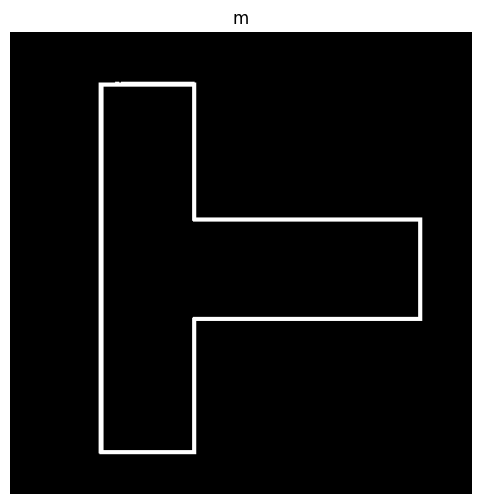

(< cv2.KeyPoint 000001772E3AE220>, < cv2.KeyPoint 0000017731AE0480>, < cv2.KeyPoint 0000017731AE11D0>, < cv2.KeyPoint 000001772E43EF10>, < cv2.KeyPoint 00000177309B61F0>, < cv2.KeyPoint 00000177313732A0>, < cv2.KeyPoint 0000017731370C60>, < cv2.KeyPoint 00000177313738D0>, < cv2.KeyPoint 0000017731370480>, < cv2.KeyPoint 000001772FF43510>)


In [74]:
'''
ShapeTransformer 单独使用
'''
img1 = cv2.imread('./image/shape/13.png', -1)
contours1, _ = cv2.findContours(img1, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
points1 = make_points(contours1[0])

img2 = cv2.imread('./image/shape/14.png', -1)
contours2, _ = cv2.findContours(img2, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
points2 = make_points(contours2[0])

# def make_mask(img, ps):
#     mask = np.zeros(img.shape, dtype=np.uint8)
#     for p in ps.reshape(-1, 2):
#         p0, p1 = int(p[0]), int(p[1])
#         mask[p0-2:p0+3, p1-2:p1+3] = 255
#     return mask
# mask1, mask2 = make_mask(img1, points1), make_mask(img2, points2)

sift = cv2.SIFT_create()

# keypoints1, descriptors1 = sift.detectAndCompute(img1, mask=mask1)

keypoints1, descriptors1 = sift.detectAndCompute(img1, mask=None)
# keypoints2, descriptors2 = sift.detectAndCompute(img2, mask=mask2)

# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# matches = bf.match(descriptors1, descriptors2)

# shapes1, shapes2 = [], []

# # transformer = cv2.createThinPlateSplineShapeTransformer()
# # extractor.setTransformAlgorithm(transformer)
# # result = extractor.computeDistance(points1, points2)
# # _, trans_points2 = transformer.applyTransformation(points2.reshape(1, -1, 2))

# # show_images([
# #     ('img1', draw_points(img1, points1)),
# #     ('img2', draw_points(img2, points2)),
# #     ('AffineTransformer', draw_points(img2, trans_points1)),
# #     ('ThinPlateSplineShapeTransformer', draw_points(img2, trans_points2)),
# # ])